In [110]:
from collections import Counter
import math
import matplotlib.pyplot as plt
import numpy as np

In [38]:
data=[]
#чтение файла в переменную data
with open(r'C:\Users\Алина\Desktop\Москва_2021.txt') as f:
    while True:
        line=f.readline()
        if not line:
            break
        data.append(int(line.rstrip()))

In [531]:
#дискретный ряд распределения
discrete=Counter(sorted(data))

#выборочная средняя
summ = 0
for key,val in discrete.items():
    summ+=key*val
discr_mean = summ/len(data)

#Дисперсия
kv_summ = 0
for key,val in discrete.items():
    kv_summ+=((key-discr_mean)**2)*val
discr_disp = kv_summ/len(data)

#Среднее квадратическое отклонение
discr_sko = math.sqrt(discr_disp)

#Коэффициент вариации
discr_v = discr_sko/discr_mean*100

#Мода и ее частота
a=max(discrete.items(), key=lambda k: k[1])
moda=a[0]
freq=a[1]

#Медиана
index=len(data)//2
disc_median = data[index+1]

#Минимальное и максимальное значения
disc_max = max(discrete)
disc_min = min(discrete)

#Размах
discr_R = disc_max-disc_min


print('Выборочное среднне =',discr_mean)
print('Дисперсия =',discr_disp)
print('Среднее квадратическое отклонение =',discr_sko)
print('Коэффициент вариации =',discr_v)
print('Мода =',moda, ',','ее частота =',freq)
print('Медиана =',disc_median)
print('Максимальное значение =',disc_max,'Минимальное значение =',disc_min)
print('Размах =',discr_R)

Выборочное среднне = 35.37300681614903
Дисперсия = 144.91696806481494
Среднее квадратическое отклонение = 12.038146371631097
Коэффициент вариации = 34.03201326423644
Мода = 29 , ее частота = 1340
Медиана = 34
Максимальное значение = 73 Минимальное значение = 14
Размах = 59


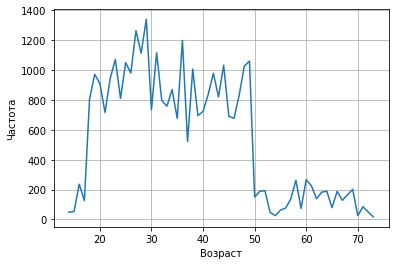

In [483]:
#Полигон частот
plt.plot(np.array(list(discrete.keys())),np.array(list(discrete.values())))
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

#plt.figure(figsize=(11, 7))
#plt.plot(discrete.keys(),discrete.values())
#plt.show()

In [555]:
#Интервальный ряд распределения
m = int(np.ceil(1+3.322*math.log10(59))) #число интервалов (7)
h = int(np.ceil((max(data)-min(data))/m)) #длина интервала (9)


In [556]:
interv1=Counter(sorted(data))
intervals = []
freqs = []
for i in range(m):
    lower = min(interv1)+h*i
    upper = lower+h
    intervals.append((lower,upper))
    summa = 0
    for j in range(h):
        if lower+j in interv1:
            summa+=interv1[lower+j]
    freqs.append(summa)
    
#интервальный ряд
interv = dict(zip(intervals,freqs))
for key,val in interv.items():
    print(f'{key} : {val}')

#Выборочное среднее
summa = 0
for key,val in interv.items():
    summa+=((key[0]+key[1])/2)*val
interv_mean = summa/len(data)

#Дисперсия
summa = 0
for key,val in interv.items():
    summa+=(((key[0]+key[1])/2-interv_mean)**2)*val
interv_disp = summa/len(data)

#Среднее квадратическое отклонение
interv_sko = math.sqrt(interv_disp)

#Коэффициент вариации
interv_v = interv_sko/interv_mean*100

#Мода
a=max(interv.items(), key=lambda k: k[1])
mod_interval = a[0]
mod_freq = a[1]
interv_moda = mod_interval[0]+h*((mod_freq-4811)/((mod_freq-4811)+mod_freq-7243))

#Медиана
summa = 0 #накопленные частоты
mid = len(data)/2
for key,val in interv.items():
    summa+=val
    if summa>mid:
        med_interval = key #медианный интервал
        med_freq = val #частота медианного интервала
        break
interv_med = med_interval[0]+h*((len(data)/2-(summa-med_freq))/med_freq)

#Максимальное и минимальное значения
interv_min = list(interv1.keys())[0]
interv_max = list(interv1.keys())[-1]

#Размах
interv_r = interv_max -interv_min


print()
print('Выборочная средняя =', interv_mean)
print('Дисперсия =',interv_disp)
print('Среднее квадратическое отклонени =', interv_sko)
print('Коэффициент вариации =',interv_v)
print('Мода =',interv_moda)  
print('Медиана =', interv_med)
print('Максимальное значение =', interv_max,'Минимальное значение =', interv_min)
print('Размах =', interv_r)

(14, 23) : 4811
(23, 32) : 9476
(32, 41) : 7243
(41, 50) : 7951
(50, 59) : 1140
(59, 68) : 1472
(68, 77) : 330

Выборочная средняя = 35.630894735218824
Дисперсия = 148.53617748955162
Среднее квадратическое отклонени = 12.187541896935231
Коэффициент вариации = 34.20498415070289
Мода = 29.086546825166714
Медиана = 34.39134336600856
Максимальное значение = 73 Минимальное значение = 14
Размах = 59


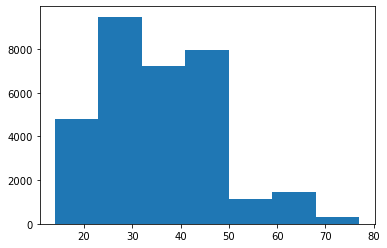

In [557]:
l = [i[0] for i in list(interv.keys())]
l.append(list(interv.keys())[-1][1])
plt.stairs(list(interv.values()),l,fill=True,)